# 1.3 - Clasificacion multi-etiqueta

![mlr](images/mlr.png)


![telecom](images/telecom.jpeg)

In [1]:
import pandas as pd                                # panel data, for handling dataframes
pd.set_option('display.max_columns', None)         # show all columns of the dataframe

import numpy as np                                 # numerical python, linear algebra library

import pylab as plt                                # plotting library
import seaborn as sns                              # plotting library
sns.set(style='white')                             # seaborn style


from sklearn.linear_model import LogisticRegression            # logistic regression model            
from sklearn.preprocessing import StandardScaler               # standarized
from sklearn.preprocessing import LabelEncoder               

from sklearn.model_selection import train_test_split as tts    # split data into train and test sets

### Datos

In [2]:
df=pd.read_csv('../data/churn.csv')

df.head()  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low,Very Low,New,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Low,Moderate,Loyal,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low,Very Low,New,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Low,Moderate,Loyal,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moderate,Very Low,New,1.0


In [3]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

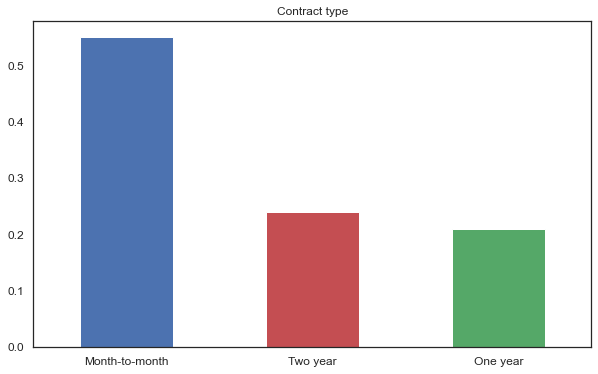

In [4]:
(df.Contract.value_counts()/len(df)).plot.bar(color=['b', 'r', 'g'],    
                                           figsize=(10, 6),
                                           title='Contract type',
                                           rot=0,
                                           fontsize=12);

### Transformacion

In [5]:
data_num=pd.DataFrame(StandardScaler().fit_transform(df._get_numeric_data()),  # standardize numeric columns
                      columns=df._get_numeric_data().columns)

data_obj=df.select_dtypes(include='object')  # get categoric columns


data=pd.concat([data_num, data_obj], axis=1)   # concatenate both dataframes

In [6]:
# label encoding 

le=LabelEncoder()

for c in data.columns:
    if data.dtypes[c]==object:
        le.fit(data[c].astype(str))
        data[c]=le.transform(data[c].astype(str))

In [7]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnBinary,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthLevel,TotalLevel,TenureLevel
0,-0.440327,-1.280248,-1.161694,-0.994194,-0.601663,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,4,1
1,-0.440327,0.064303,-0.260878,-0.173740,-0.601663,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,1,2,0
2,-0.440327,-1.239504,-0.363923,-0.959649,1.662059,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,1,4,1
3,-0.440327,0.512486,-0.747850,-0.195248,-0.601663,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,1,2,0
4,-0.440327,-1.239504,0.196178,-0.940457,1.662059,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,4,1


### Modelado

In [8]:
X=data.drop('Contract', axis=1)   # all data except target

y=data.Contract               # target data

In [9]:
y.unique()

array([0, 1, 2])

In [10]:
X_train, X_test, y_train, y_test=tts(X, y, random_state=42)

In [11]:
logreg=LogisticRegression(max_iter=2000)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [12]:
y_pred=logreg.predict(X_test)   

y_pred[:10]

array([2, 0, 0, 0, 0, 0, 1, 0, 0, 2])

In [13]:
sum(y_pred==y_test)/y_pred.shape[0]*100  # acierto, accuracy

72.9806598407281